<img src="images/airplane_hangar.jpg">

[Credit: Pexels.com](https://www.pexels.com/search/hangar/)


# Business Understanding

This analysis has been conducted as my company has decided to diversify their business portfolio by expanding operations to the aircraft industry and purchasing commercial and private planes.

By conducting this analysis my main goal is to identify and recommend low-risk aircrafts, including make and model, to purchase by analyzing historical aviation accident data from the National Transportation Safety Board (NTSB). This information should help relevant stakeholders within my company: the Head of the New Aviation Division, the Executive Management, the Legal and Compliance team, the financial team and risk management team to be able to make an strategic decision on which aircrafts to purchase based on the aircraft risk profile to run a successful aviation division. 

To be able to complete this project, I have focus on answering on the following questions:
1. How do Engine Type and Number of Engines affect aircraft fatality rate?
2. Which are the low-risk aircraft models per Commercial and Private Aircrafts?
3. Does the flight phase has any effect in identifying low-risk aircrafts?

# Data Understanding

To database to complete this analysis is <a href="https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses">the NTSB aviation accident database</a> which contains information from 1962 until 2023 about civil aviation accidents and selected incidents within the United States. The size of the database is 90,348 lines of entries and 31 columns. From the database column: 26 columns are related to categorical information and 5 to quantitative information.

This database is a valuable resource for identifying low-risk aircraft due to the following reasons:
- ***Comprehensive data*** as the dataset has information spanning from 1962-2023.
- Database contains ***detailed information about each accident*** such as make, model, flight phase, weather conditions and other.
- ***Reliable and accurate as the NTSB is a reputable government agency*** which conducts on-site investigations into aviation accidents in the US.

After looking into the database and the available data (columns which contain more than 60% of the information) I decided that I will determine the low risk aircraft manufacturers and models based on accidents that happened in the US by focusing on accident count and a fatality injury rate as well as look into engine type, number of engines and broad phase flight information. This means that I will be dropping 16 columns from the database as they will not give me relevant information to answer my business questions:'Event.Id', 'Investigation.Type', 'Accident.Number', 'Location', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Injury.Severity' and 'Weather.Condition'.

It is also important to mention that for the columns that I kept for the analysis, I used the 'Model' column to backtrack the missing values for some categorial columns and 'Number.of.Engines', which is a quantitative columns. For the rest of categorical columns, I did not create placeholders but created an 'Unknown' category, while for the rest of the quantitative columns as the data was mostly positively skewed I used the 'median' to fill in the missing values.

### Data Limitation 

Based on the content of the NTSB aviation accident database, I have identify the following limitations with this database to fully identify low-risk aircrafts:
- ***Reporting bias:*** Per the description from the database not all accidents are reported and the data does not contain accidents from many locations outside of the US which could potentially skewed the data and lead to the underestamination of aircraft risk.
- ***Data completeness:*** Some accidents may have limited or incomplete data. We also do not contain information of the aircraft float to know based on the number of total aircraft what is the rate of accidents per manufacturer and aircraft model.
- ***Sample size limitations:*** Some aircraft types, engines type or specific flight phases may be limited, making it difficult to draw definite conclusions.
- ***Complexity of accidents:*** Accidents are influenced by multiple factors like pilot error, pilot training, pilot experience, mechanical failures, weather condition, traffic control issues, safety regulations, aircraft maintainance, aircraft age, operational differences between private and commercial planes and others which are not all present in the database. Because of this it can be difficult to isolate the actual causes of the accidents and as a result challenging to correctly determine which are the low risk aircrafts.

### Data Preparation

To prepare the data fot this analysis, I will first import the data to my notebook and then proceed to clean and prepare the data for further analysis. 

The steps I took to clean and prepare the data are the following:
1. **Cleaning the database**: Removing duplicate rows, removing unnecesary columns and managing missing values by using the 'Model' column to complete the data, creating an 'Unknown' category or removing the relevant rows. The data cleaning was necessary to avoid double counting accidents and avoid skewed results.
2. **Converting columns to the correct data type**, example converting the column 'Event.Date' to Date format.
3. Feature engineering included:
   - Creating new columns with new clean data or calculating new values (categorical and numerical) to complete the analysis.
   - Limit the data only for years with relevant data

Additionally, to be able to make a recommendation on low-risk aircrafts I took a couple of additional steps:
1. Created a column 'Uninjured Rate' and 'Fatality Injury Rate' to be able to understand the mean uninjured and fatality injury rate per Make and Model and be able to make a recommendation. 'Fatality Injury Rate' consists of both 'Total Fatal Injuries' + 'Total Serious Injuries' because as a new player in the aviation industry I want to be able to demostrate that I have a safe operation so the goal should be to have no injuries during our flights.
2. Use the Make to create a new column splitting the database according to Commercial and Private Planes. Private and Commercial planes have different characteristics as well as different operating and safety protocols so it will not be possible to make a comparisons and define low-risk aircraft if all these are in the same database.
3. According to the Make column, we have over 5K different type of aircraft manufacturers. As we are trying to make an strategic decision on which low-risk aircraft to purchase, I decided to only investigate manufacturers with highest Market Share:
   - For Private Planes, I am only focusing on the Top 5 Jet manufactures in the US as per <a href="https://simpleflying.com/top-5-private-jet-manufacturers-market-share-usa/">this article</a>: Cessna, Gulfstream, Bombardier, Dassault Aviation and Hawker.
   - For the Commercial Planes, I selected the top 3 market leaders as per <a href="https://www.mordorintelligence.com/industry-reports/commercial-aircraft-market/market-share">this article</a>: Airbus, Embraer and Boeing.

My final recommendations will be dependent on the lowest numbers of accidents and Fatality Injury Rate identified separately for Commercial and Private Plane databases.

In [47]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_theme(style="white") 

In [48]:
#We load the database
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/master/data/Aviation_Data.csv')
df.head()

/var/folders/m4/n_j2g_dn24n81fk8rkm1npww0000gn/T/ipykernel_7626/2516494880.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/master/data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [49]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [50]:
#Understanding missing values for the dataset in %
df.isna().sum()/len(df)*100

Event.Id                   0.077565
Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport.Code              43.645316
Airport.Name              40.754064
Injury.Severity            1.201691
Aircraft.damage            3.668023
Aircraft.Category         63.705344
Registration.Number        1.631107
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.054363
FAR.Description           64.002113
Schedule                  85.856247
Purpose.of.flight          7.038153
Air.carrier               81.285550
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5

Based on the above information I can see that we are missing ~36% of the 'Aircraft.Category' information. Per our business need, we are trying to understand the risk of 'airplanes' so before filtering we will try to fill in missing values by backtracking information from the 'Model' column.

In [51]:
#Let's first clean the column 'Model'
df['Model']=df['Model'].str.upper()
df['Model']=df['Model'].str.replace(' ','')
df['Model']=df['Model'].str.replace('.','')
df['Model']=df['Model'].str.replace(r'\s|-', '', regex=True)
df['Model']=df['Model'].fillna(value='Unknown')

In [52]:
#Create a dictionary with 'Model' and 'Aircraft Category' to fill in the column 'Aircraft.Category'
mapping_dict=df.set_index('Model')['Aircraft.Category'].to_dict()
df['Aircraft.Category'] = df['Aircraft.Category'].fillna(df['Model'].map(mapping_dict))

In [53]:
#Now I filter df to only contain airplane information
df = df[df['Aircraft.Category'] == 'Airplane']
df.shape

(67045, 31)

Next step is to prepare our data to complete analysis:
1) Drop unnecesary columns
2) Fill in/replace/remove missing values for columns with categorical information
3) Fill in/replace/remove missing values for columns with quantitative information

In [54]:
#1. We drop unnecesary columns for this project
df.drop(columns=['Event.Id', 'Investigation.Type', 'Accident.Number','Location','Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Registration.Number','FAR.Description','Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Injury.Severity','Weather.Condition'], inplace=True)

In [55]:
#Understanding missing values for the dataset in %
df.isna().sum()/len(df)*100

Event.Date                 0.000000
Country                    0.132747
Aircraft.damage            2.978596
Aircraft.Category          0.000000
Make                       0.019390
Model                      0.000000
Amateur.Built              0.095458
Number.of.Engines          5.482885
Engine.Type                7.223507
Purpose.of.flight          6.865538
Total.Fatal.Injuries      12.563204
Total.Serious.Injuries    13.817585
Total.Minor.Injuries      13.028563
Total.Uninjured            6.115296
Broad.phase.of.flight     33.294056
dtype: float64

In [56]:
#2. We move on to fill in/replace/remove NaN for columns with categorical information
#'Country'
df['Country'].value_counts()[:10]

Country
United States     62361
Brazil              276
Mexico              268
United Kingdom      254
Canada              246
Australia           212
Bahamas             188
Spain               188
France              183
Germany             150
Name: count, dtype: int64

In [57]:
#As over 90% of the information is from the US, I am dropping any other country
df = df[df['Country'] == 'United States']

In [58]:
#'Aircraft.damage' fill NaN with 'Unknown'
df['Aircraft.damage']=df['Aircraft.damage'].fillna(value='Unknown')

In [59]:
#Make
#First we try to fill in the NaN based on the Model column
make_dict=df.set_index('Model')['Make'].to_dict()
df['Make'] = df['Make'].fillna(df['Model'].map(make_dict))
#Then we clean the column
df['Make']=df['Make'].str.title()
df['Make']=df['Make'].str.replace(r'[^\w\s]', '', regex=True)
df['Make']=df['Make'].fillna(value='Unknown')

In [60]:
#Standardizing some Key Make Names for the analysis
#Commercial Planes
df['Make'] = df['Make'].apply(lambda x: "Airbus" if "Airbus" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Boeing" if "Boeing" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Embraer" if "Embraer" in x else x)
#Private Planes
df['Make'] = df['Make'].apply(lambda x: "Cessna" if "Cessna" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Gulfstream" if "Gulfstream" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Bombardier" if "Bombardier" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Dassault" if "Dassault" in x else x)
df['Make'] = df['Make'].apply(lambda x: "Hawker" if "Hawker" in x else x)

In [61]:
#'Amateur.Built'
#As we are a business, I will drop all the lines that have an 'Amateur.Built' == 'Yes' 
#This is because we assume that 'Amateur.Built' aircrafts are associated with higher risk
df = df[df['Amateur.Built'] == 'No']

In [62]:
#'Engine.Type'
#First we try to fill in the NaN based on the Model column
eng_type_dict=df.set_index('Model')['Engine.Type'].to_dict()
df.loc[df['Engine.Type'].isna(), 'Engine.Type'] = df['Model'].map(eng_type_dict)

#Then we clean the column filling NaN with 'Unknown'
df.loc[df['Engine.Type'] == 'UNK', 'Engine.Type'] = 'Unknown'
df.loc[df['Engine.Type'].isna(), 'Engine.Type'] = 'Unknown'

In [63]:
#'Purpose.of.flight'
#Understanding the values in the column
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Ferry', 'Unknown',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop', 'Glider Tow',
       'Public Aircraft - Federal', 'Public Aircraft - State',
       'Banner Tow', 'Firefighting', 'External Load', 'Air Race show',
       'Public Aircraft - Local', 'PUBS', 'ASHO'], dtype=object)

In [64]:
#Dropping the purposes which are not related to our analysis
#Per my investigation these are primarily related with publick aircraft or specialized operations not related to private/commercial airplanes
rows_to_drop =['Public Aircraft - Federal','Public Aircraft - State', 'Public Aircraft - Local', 'Banner Tow', 'Firefighting', 'Glider Tow','External Load', 'ASHO']
df = df[~df['Purpose.of.flight'].isin(rows_to_drop)]
#Filling in the NaN with 'Unknown'
df['Purpose.of.flight']=df['Purpose.of.flight'].fillna(value='Unknown')

In [65]:
#'Broad.phase.of.flight' fill NaN with 'Unknown'
df['Broad.phase.of.flight']=df['Broad.phase.of.flight'].apply(lambda x: 'Unknown' if x == 'Other' else x)
df['Broad.phase.of.flight']=df['Broad.phase.of.flight'].fillna(value='Unknown')

In [66]:
#3. Moving on to fill in/replace/remove NaN for columns with quantitative information
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,55769.000000,49265.000000,48740.000000,49225.000000,53400.000000
mean,1.154136,0.405217,0.239844,0.301432,4.042828
std,0.389327,1.876071,1.273429,1.135356,22.480903
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,228.000000,137.000000,96.000000,699.000000


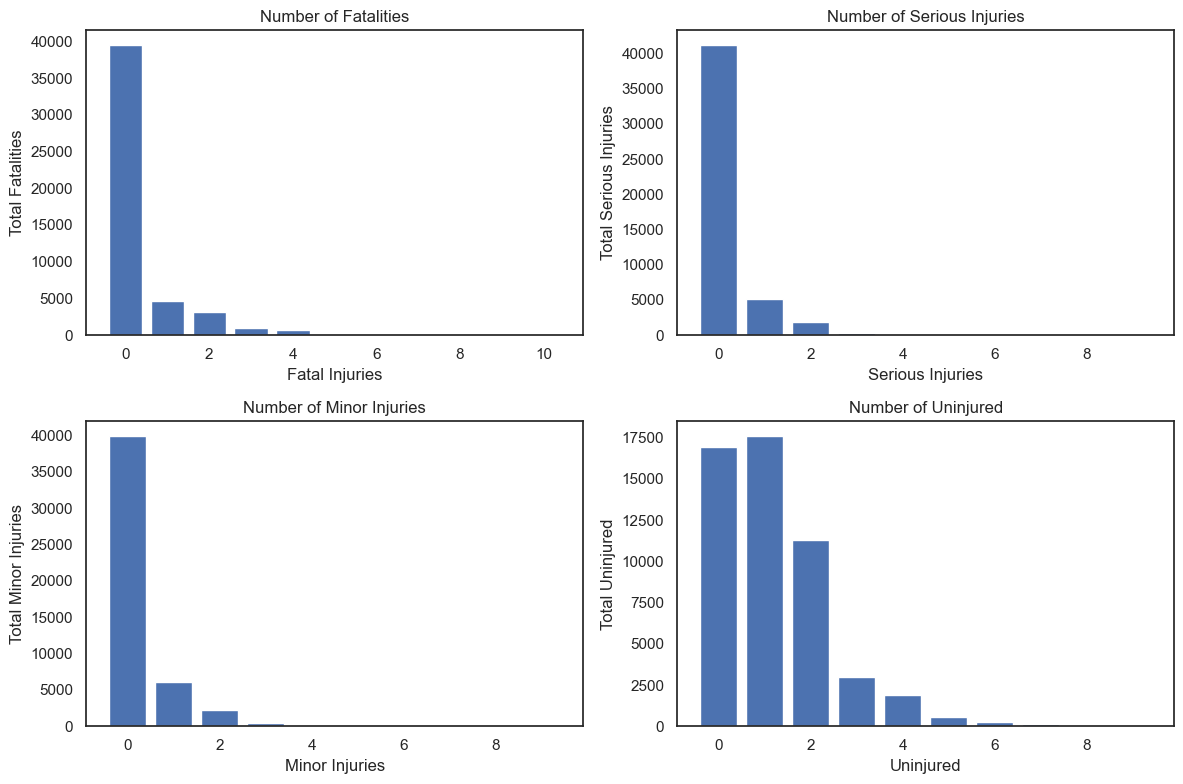

In [67]:
#Plotting columns'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries' and 'Total.Uninjured' to determine 
#which is the best replacement method for the missing values as the above table is not enough to determine this.

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(df['Total.Fatal.Injuries'].value_counts().index[0:10], df['Total.Fatal.Injuries'].value_counts().values[0:10])
plt.title('Number of Fatalities')
plt.xlabel('Fatal Injuries')
plt.ylabel('Total Fatalities')

plt.subplot(2, 2, 2)
plt.bar(df['Total.Serious.Injuries'].value_counts().index[0:10], df['Total.Serious.Injuries'].value_counts().values[0:10])
plt.title('Number of Serious Injuries')
plt.xlabel('Serious Injuries')
plt.ylabel('Total Serious Injuries')

plt.subplot(2, 2, 3)
plt.bar(df['Total.Minor.Injuries'].value_counts().index[0:10], df['Total.Minor.Injuries'].value_counts().values[0:10])
plt.title('Number of Minor Injuries')
plt.xlabel('Minor Injuries')
plt.ylabel('Total Minor Injuries')

plt.subplot(2, 2, 4)
plt.bar(df['Total.Uninjured'].value_counts().index[0:10], df['Total.Uninjured'].value_counts().values[0:10])
plt.title('Number of Uninjured')
plt.xlabel('Uninjured')
plt.ylabel('Total Uninjured')

plt.tight_layout();

In [68]:
#Based on the above graphs, I can see that the information is positively skewed. 
#In these cases the median is generally the most robust choice for imputing missing values. 
#I will replace NaN values with the median below.
#Create a function to fill in the 4 columns with the median
def fill_missing_with_median(df, column):
    df[column] = df[column].fillna(value=df[column].median())

# Apply the function using a loop to a list of the columns I want to modify
columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for column in columns:
    fill_missing_with_median(df, column)

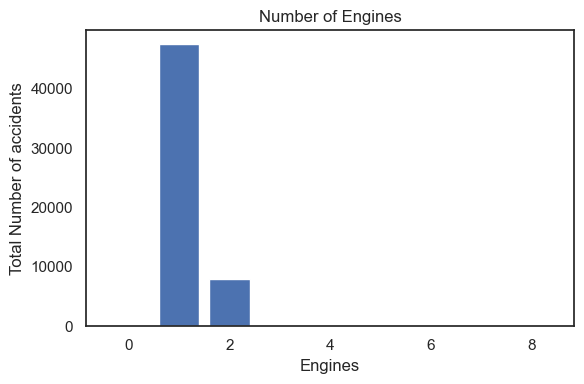

In [69]:
#Moving on to the columns 'Number.of.Engines'
# We are going to first plot the column to see how the data is distributed
plt.figure(figsize=(6, 4))
plt.bar(df['Number.of.Engines'].value_counts().index[0:10], df['Number.of.Engines'].value_counts().values[0:10])
plt.title('Number of Engines')
plt.xlabel('Engines')
plt.ylabel('Total Number of accidents')
plt.tight_layout();

In [70]:
#The data above is positively skewed so the median will be the most robust measure to fill in missing values
#I will proceed to fill in the missing values using two methods

#Replacing the NaN in the 'Number.of.Engines' column using the Model column
number_engines_dict=df.set_index('Model')['Number.of.Engines'].to_dict()
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Model'].map(number_engines_dict))

#For the remaining of the missing values, I will use the median.
df['Number.of.Engines']=df['Number.of.Engines'].fillna(value=df['Number.of.Engines'].median())

Now that I have clean all the columns I will confirm that I have no more missing values.

In [71]:
df.isna().sum()

Event.Date                0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Broad.phase.of.flight     0
dtype: int64

### Feature Engineering

In [72]:
#Turning Event.Date into date format
df['Event.Date']=pd.to_datetime(df['Event.Date'])
#Creating a Month and Year column based on 'Event.Date
df['Event.Month']=df['Event.Date'].dt.month
df['Event.Year']=df['Event.Date'].dt.year

In [73]:
#Creating a new column 'Total_Passengers'  
df['Total_Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']
df['Total_Passengers'] = df['Total_Passengers'].fillna(0)

In [74]:
# Create a column to calculate the 'Fatal_Injury_Rate' based on ('Total.Fatal.Injuries'+ Total.Serious.Injuries') and 'Total_Passengers'
df['Fatal_Injury_Rate'] = ((df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']) / df['Total_Passengers'])
df['Fatal_Injury_Rate'] = df['Fatal_Injury_Rate'].fillna(0)

In [75]:
# Create a column to calculate the 'Uninjured_Rate' based on 'Total.Uninjured' and 'Total_Passengers'
df['Uninjured_Rate'] = (df['Total.Uninjured'] / df['Total_Passengers'])
df['Uninjured_Rate'] = df['Uninjured_Rate'].fillna(0)

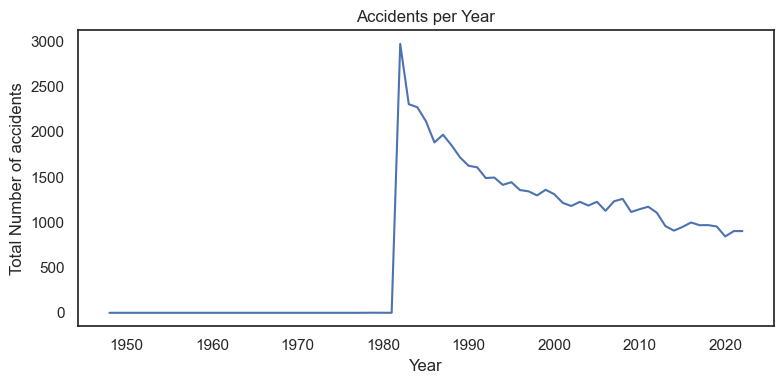

In [76]:
#Understand yearly accident distribution to see if we need to limit the data
accidents_per_year = df['Event.Year'].value_counts().sort_index()
accidents_per_year.plot(kind='line', figsize=(8, 4))
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of accidents')
plt.tight_layout();

In [77]:
#As we barely have information before 1982, we are going to limit to our data to 1982 onwards
df = df[df['Event.Year'] >= 1982]

As we need to make a recommendation based on Commercial vs Private airplanes, we will add a new column 'Airplane_type'.

In [78]:
#We are defining as Commercial Makes the following Makes: Boeing, Airbus, Embraer 
#Everything else will be define as Private Planes as we will do some general analysis about Private vs Commercial Planes
df['Airplane_type']= df['Make'].apply(lambda make: 'Commercial' if make in ['Boeing', 'Airbus', 'Embraer'] else 'Private')

In [79]:
#I used the following code to create a copy of my clean data to a local data folder
#df.to_csv('./data/cleaned_accident_data.csv')

# Exploratory Data Analysis

### Analysis of Engine Related Information

#### Engine Type Analysis

##### Engine type split by Commercial/Private Planes 

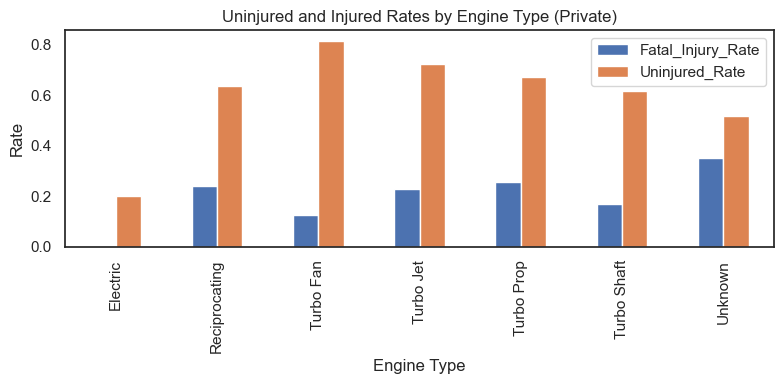

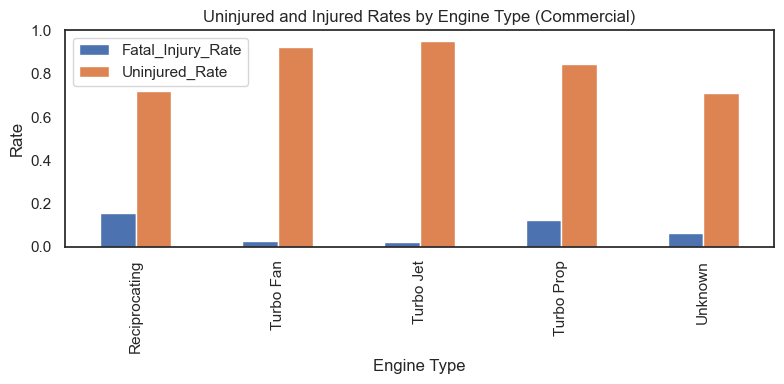

In [80]:
#Next step is to make two graphs per 'Airplane_Type' and compared Fatality/Uninjured Rate by Engine.Type
#Filter database by 'Private' and 'Commercial
p_planes = df[df['Airplane_type'] == 'Private']
c_planes = df[df['Airplane_type'] == 'Commercial']

#Grouped data and calculate mean rates
grouped_data_private = p_planes.groupby('Engine.Type')[['Fatal_Injury_Rate', 'Uninjured_Rate']].mean()
grouped_data_commercial = c_planes.groupby('Engine.Type')[['Fatal_Injury_Rate', 'Uninjured_Rate']].mean()

#Create Separate graphs
# Private Aircraft
grouped_data_private.plot(kind='bar', figsize=(8, 4))
plt.title('Uninjured and Injured Rates by Engine Type (Private)')
plt.xlabel('Engine Type')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout();

# Commercial Aircraft
grouped_data_commercial.plot(kind='bar', figsize=(8, 4))
plt.title('Uninjured and Injured Rates by Engine Type (Commercial)')
plt.xlabel('Engine Type')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout();

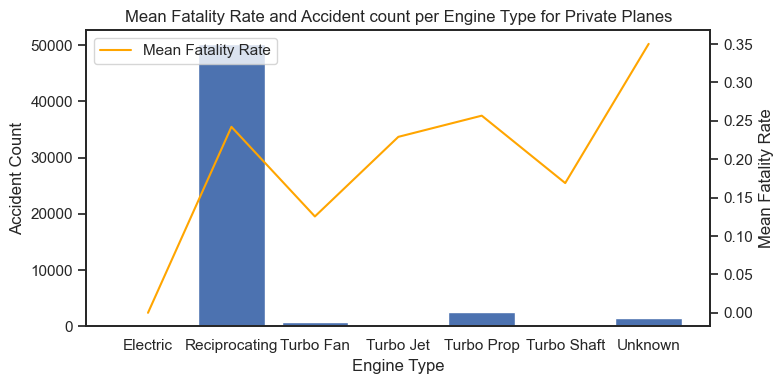

In [81]:
#Comparing Engine type fatality rate and accident count for Private Planes
#Create accident count per engine
p_engine_types_test = p_planes['Engine.Type'].value_counts().sort_index()

#Calculate mean fatality per engine
p_mean_fatality_enginetype = p_planes.groupby('Engine.Type')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Engine Type
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot bar chart
ax1.bar(p_engine_types_test.index, p_engine_types_test.values, label='Accident Count')

# Create a second axis
ax2 = ax1.twinx()

# Plot line chart
ax2.plot(p_mean_fatality_enginetype.index, p_mean_fatality_enginetype.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident count per Engine Type for Private Planes')
#plt.savefig("images/private_enginetype.jpg")
plt.legend()
plt.tight_layout();

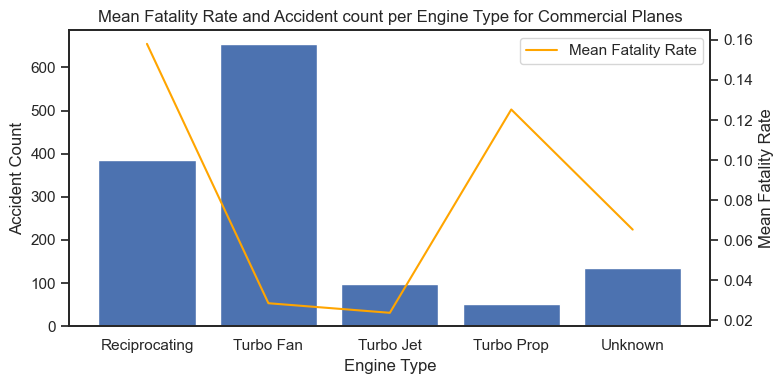

In [82]:
#Comparing Engine type fatality rate and accident count for Commercial Planes
#Create accident count per engine
c_engine_types_test = c_planes['Engine.Type'].value_counts().sort_index()

#Calculate mean fatality per engine
c_mean_fatality_enginetype = c_planes.groupby('Engine.Type')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Engine Type
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot bar chart
ax1.bar(c_engine_types_test.index, c_engine_types_test.values, label='Accident Count')

# Create a second axis
ax2 = ax1.twinx()

# Plot line chart
ax2.plot(c_mean_fatality_enginetype.index, c_mean_fatality_enginetype.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident count per Engine Type for Commercial Planes')
#plt.savefig("images/commercial_enginetype.jpg")
plt.legend()
plt.tight_layout();

#### Number of Engines Analysis

##### Number of Engines Analysis split by Commercial/Private Planes

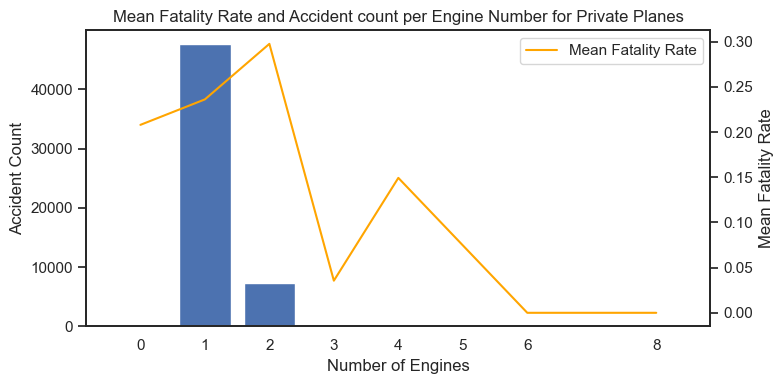

In [83]:
#Comparing number of engines, fatality rate and accident count for Private Planes
#Create accident count per number of engines
p_engine_number = p_planes['Number.of.Engines'].value_counts().sort_index()

#Calculate mean fatality per engine
p_mean_fatality_enginenumber = p_planes.groupby('Number.of.Engines')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Engine Type
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot bar chart
ax1.bar(p_engine_number.index, p_engine_number.values, label='Accident Count')

# Create a second axis
ax2 = ax1.twinx()

# Plot line chart
ax2.plot(p_mean_fatality_enginenumber.index, p_mean_fatality_enginenumber.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Number of Engines')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident count per Engine Number for Private Planes')
#plt.savefig("images/private_enginenumber.jpg")
plt.legend()
# Set x-axis ticks to 0, 1, 2, 3, 5, 4, 6, 8
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 8])
plt.tight_layout();

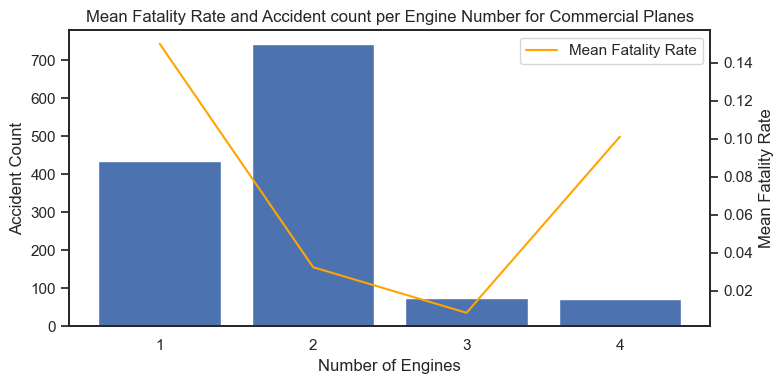

In [84]:
#Comparing number of engines, fatality rate and accident count for Private Planes
#Create accident count per number of engines
c_engine_number = c_planes['Number.of.Engines'].value_counts().sort_index()

#Calculate mean featality per engine
c_mean_fatality_enginenumber = c_planes.groupby('Number.of.Engines')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Engine Type
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot bar chart
ax1.bar(c_engine_number.index, c_engine_number.values, label='Accident Count')

# Create a second axis
ax2 = ax1.twinx()

# Plot line chart
ax2.plot(c_mean_fatality_enginenumber.index, c_mean_fatality_enginenumber.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Number of Engines')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident count per Engine Number for Commercial Planes')
#plt.savefig("images/commercial_enginenumber.jpg")
plt.legend()
# Set x-axis ticks to 1, 2, 3, 4
ax1.set_xticks([1, 2, 3, 4])
plt.tight_layout();

In [85]:
#Grouping data of 'Number of Engines' by counting per 'Airplane_Type' which splits Commercial and Private Planes
engine_number_split= df.groupby(['Number.of.Engines', 'Airplane_type']).size().unstack()
engine_number_split

Airplane_type,Commercial,Private
Number.of.Engines,,
0.0,NaN,39.0
1.0,434.0,47561.0
2.0,742.0,7289.0
3.0,75.0,92.0
4.0,71.0,48.0
6.0,NaN,1.0
8.0,NaN,1.0


In [86]:
# Calculate Pearson correlation for commercial aircraft
correlation_commercial = stats.pearsonr(c_planes['Number.of.Engines'], c_planes['Fatal_Injury_Rate'])

# Calculate Pearson correlation for private aircraft
correlation_private = stats.pearsonr(p_planes['Number.of.Engines'], p_planes['Fatal_Injury_Rate'])

print("Correlation for Commercial Aircraft:", correlation_commercial)
print("Correlation for Private Aircraft:", correlation_private)

Correlation for Commercial Aircraft: PearsonRResult(statistic=-0.14449902342896842, pvalue=1.3158017904551204e-07)
Correlation for Private Aircraft: PearsonRResult(statistic=0.04207517314831668, pvalue=5.373679654360047e-23)


#### Airplane Type (Commercial or Private Plane) vs Airplane Damage

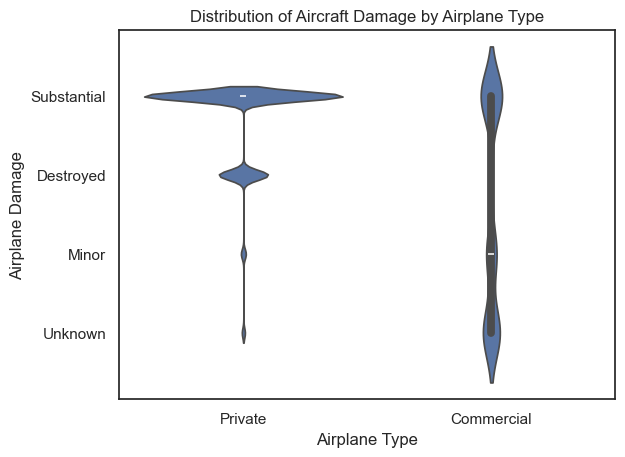

In [87]:
#Using a violin plot to understand the distribution of the Airplane Damage information per Airplane Type
sns.violinplot(x='Airplane_type', y='Aircraft.damage', data=df)
plt.title('Distribution of Aircraft Damage by Airplane Type')
plt.xlabel('Airplane Type')
plt.ylabel('Airplane Damage')
#plt.savefig("images/aircraft_damage.jpg")
plt.show();

#### Private Planes Analysis

##### Private Plane analysis for top 5 Makers with highest Market Share

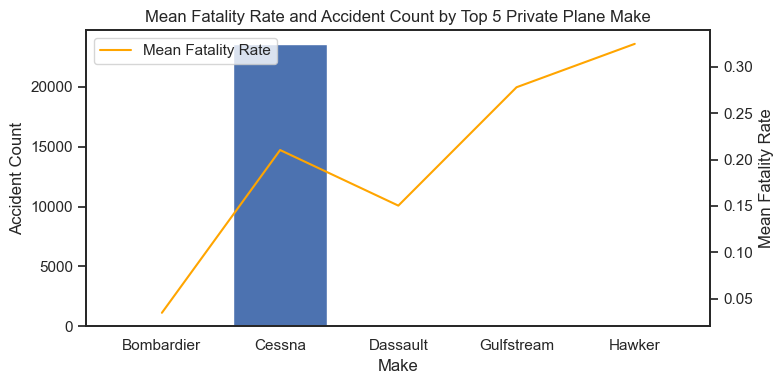

In [88]:
#Filter my Private Planes database to only contain Bombardier, Cessna, Dassault, Gulfstream and Hawker
makes_to_keep = ['Bombardier', 'Cessna', 'Dassault', 'Gulfstream', 'Hawker']
filtered_top5_pp = p_planes[p_planes['Make'].isin(makes_to_keep)]

#Create a value count for the top 5 Makes
top_5_private_makes = filtered_top5_pp['Make'].value_counts().sort_index()

#Calculate mean fatality for top 5 Makes
p_mean_fatality_new = filtered_top5_pp.groupby('Make')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for top 5 Private Makes
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot bar chart
ax1.bar(top_5_private_makes.index, top_5_private_makes.values, label='Accident Count')

# Create a second axis
ax2 = ax1.twinx()

# Plot line chart
ax2.plot(p_mean_fatality_new.index, p_mean_fatality_new.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Make')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident Count by Top 5 Private Plane Make')
#plt.savefig("images/private_mean_fatality_5.jpg")
plt.legend()
plt.tight_layout();

Based on the above information, both Bombardier and Dassault are the Private Makers which are less risky based on lower number of accidents and mean fatality rate. We will continue this analysis just looking into these two Makes and identify the safest Models to make a recommendation.

##### Analysis for Bombardier

In [89]:
#Filtering our database by Bombardier
p_planes_bombardier = filtered_top5_pp[filtered_top5_pp['Make'] == 'Bombardier']
#Normalizing the Bombardier Model Column just leaving a model series
p_planes_bombardier.loc[:, 'Model'] = p_planes_bombardier['Model'].str[:5] 

In [90]:
#Using a loop to clean the last Model
for index, row in p_planes_bombardier.iterrows():
    if 'DHC8' in row['Model']:
        p_planes_bombardier.loc[index, 'Model'] = 'DHC8'

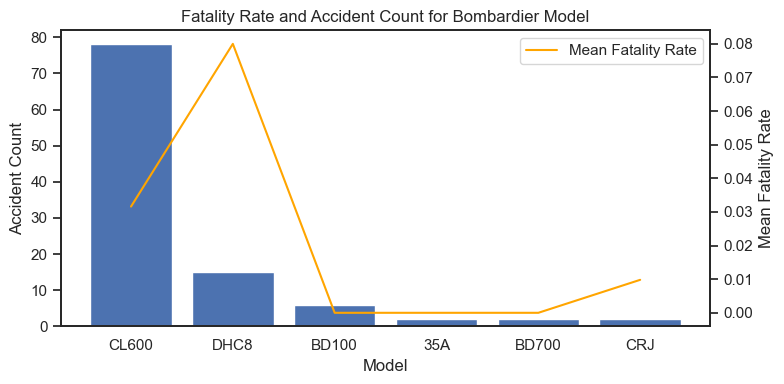

In [91]:
#Creating a groupby to calculate accident count by Model
bombardier_model = p_planes_bombardier.groupby('Model')['Fatal_Injury_Rate'].agg(['mean','count']).sort_values(by='count', ascending=False)
#Plotting the grouped information for Bombardier
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot the accident count on the left y-axis
ax1.bar(bombardier_model.index, bombardier_model['count'], label='Accident Count')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accident Count')

# Create a second axis for the count on the right y-axis where I will plot Mean Fatality Rate
ax2 = ax1.twinx()
ax2.plot(bombardier_model.index, bombardier_model['mean'], label='Mean Fatality Rate', color='orange')
ax2.set_ylabel('Mean Fatality Rate')

# Set the title and adjust the layout
plt.title('Fatality Rate and Accident Count for Bombardier Model')
plt.legend()
plt.tight_layout();

In [92]:
#Creating a Pivot to see the split of the Bombardier Models and their 'Engine.type' and 'Number.of.Engines' information
bombardier_model_engine=p_planes_bombardier.pivot_table(index=['Model', 'Engine.Type', 'Number.of.Engines'], values='Fatal_Injury_Rate', aggfunc='mean')
bombardier_model_engine

Fatal_Injury_Rate
Model Engine.Type Number.of.Engines                   
35A   Turbo Fan   2.0                         0.000000
BD100 Turbo Fan   2.0                         0.000000
      Turbo Shaft 2.0                         0.000000
      Unknown     2.0                         0.000000
BD700 Turbo Fan   2.0                         0.000000
CL600 Turbo Fan   1.0                         0.016667
                  2.0                         0.038726
      Turbo Jet   2.0                         0.000000
      Unknown     2.0                         0.000694
CRJ   Turbo Jet   2.0                         0.019608
      Unknown     2.0                         0.000000
DHC8  Turbo Prop  1.0                         0.000000
                  2.0                         0.085675

##### Analysis for Dassault

In [93]:
#Filtering our database by Dassault
p_planes_dassault = p_planes[p_planes['Make'] == 'Dassault']

In [94]:
#Standardizing the model column for Dassault
for index, row in p_planes_dassault.iterrows():
    if 'FALCON900' in row['Model']:
        p_planes_dassault.loc[index, 'Model'] = 'FALCON900'
    elif 'FANJET' in row['Model']:
        p_planes_dassault.loc[index, 'Model'] = 'FANJET'
    elif 'DA20' in row['Model']:
        p_planes_dassault.loc[index, 'Model'] = 'FALCON DA20'
    elif 'MIRAGEF1' in row['Model']:
        p_planes_dassault.loc[index, 'Model'] = 'MIRAGEF1'
    elif row['Model'] in ['10', '20C', '50']:
        new_model = f'FALCON{row["Model"]}'
        if new_model.endswith('C'):
            new_model = new_model[:-1]  # Remove the 'C'
        p_planes_dassault.loc[index, 'Model'] = new_model

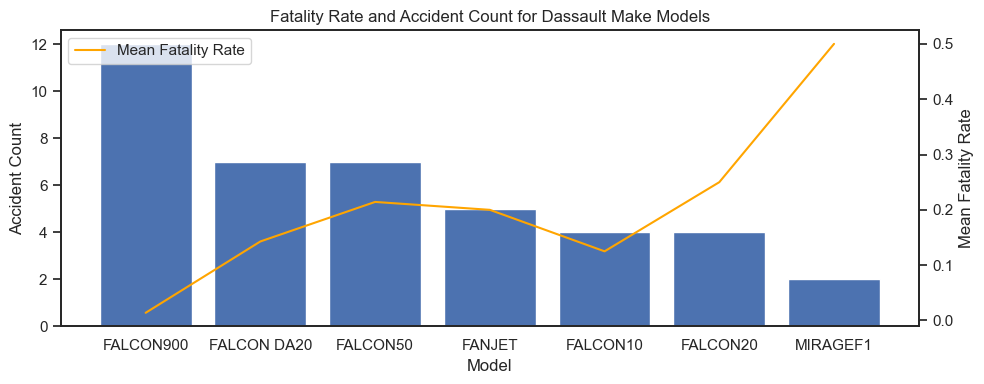

In [95]:
#Creating a Pivot to see the split of the Dassault Models and their 'Engine.type' and 'Number.of.Engines' information
dassault_model = p_planes_dassault.groupby('Model')['Fatal_Injury_Rate'].agg(['mean','count']).sort_values(by='count', ascending=False)
#Plotting the group model information for Dassault
fig, ax1 = plt.subplots(figsize=(10,4))

# Plot the accident count on the left y-axis
ax1.bar(dassault_model.index, dassault_model['count'], label='Accident Count')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accident Count')

# Create a second axis for the count on the right y-axis where I will plot Mean Fatality Rate
ax2 = ax1.twinx()
ax2.plot(dassault_model.index, dassault_model['mean'], label='Mean Fatality Rate', color='orange')
ax2.set_ylabel('Mean Fatality Rate')

# Set the title and adjust the layout
plt.title('Fatality Rate and Accident Count for Dassault Make Models')
plt.legend()
plt.tight_layout();

In [96]:
#Creating a Pivot to see the split of the top 10 Models for Dassault and their 'Engine.type' and 'Number.of.Engines' information
dassault_model_engine=p_planes_dassault.pivot_table(index=['Model', 'Engine.Type', 'Number.of.Engines'], values='Fatal_Injury_Rate', aggfunc='mean')
dassault_model_engine

Fatal_Injury_Rate
Model       Engine.Type Number.of.Engines                   
FALCON DA20 Turbo Fan   2.0                         0.333333
            Turbo Jet   2.0                         0.000000
FALCON10    Turbo Fan   2.0                         0.000000
            Turbo Jet   2.0                         0.250000
FALCON20    Turbo Fan   2.0                         0.333333
            Unknown     2.0                         0.000000
FALCON50    Turbo Fan   2.0                         0.000000
                        3.0                         0.300000
            Turbo Jet   3.0                         0.000000
FALCON900   Turbo Fan   2.0                         0.000000
                        3.0                         0.018519
            Unknown     3.0                         0.000000
FANJET      Turbo Fan   2.0                         0.000000
            Unknown     2.0                         0.500000
MIRAGEF1    Unknown     1.0                         0.500000

#### Commercial Planes

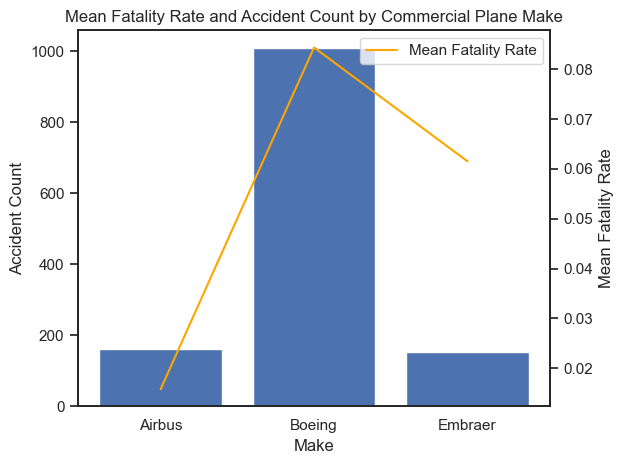

In [97]:
#Prepare count and mean fatality rate data based on Commercial Planes Data
c_count = c_planes['Make'].value_counts().sort_index()
c_mean_fatality = c_planes.groupby('Make')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Commercial Planes
fig, ax1 = plt.subplots()

# Plot the accident count on the left y-axis
ax1.bar(c_count.index, c_count.values, label='Accident Count')

# Create a second axis for the count on the right y-axis where I will plot Mean Fatality Rate
ax2 = ax1.twinx()
ax2.plot(c_mean_fatality.index, c_mean_fatality.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Make')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident Count by Commercial Plane Make')
#plt.savefig("images/commercial_mean_fatality_3.jpg")
plt.legend()
plt.tight_layout();

Based on the above information, Airbus and Embraer are the Commercial Plane Makers with the less risk just based on the total accident count and mean fatality rate. Based on <a href="https://www.forbes.com/sites/geoffwhitmore/2019/08/16/what-is-the-safest-airplane-to-fly/">this article</a>, airplane safety seems to be associated with newer planes and Embraer has not launched any new commercial planes since 1995. However, Airbus keeps updating their commercial planes on a recurrent basis, being their newest model the A350 on 2013. Additionally, as per <a href="https://sites.lsa.umich.edu/mje/2024/05/08/comacs-impact-on-the-future-of-the-airbus-boeing-duopoly/#:~:text=For%20decades%2C%20two%20major%20firms,other%2060.4%25%20of%20the%20industry.">The Michigan Journal of Economics,</a> Airbus holds 60.4% of the commercial industry which shows the reliability of the brand.

##### Analysis for Airbus

In [98]:
#Creating a database just for Airbus
c_planes_airbus = c_planes[c_planes['Make']=='Airbus']
#Creating a new column to standardized Model & cleaning this column in the following code cells
c_planes_airbus.loc[:, 'Model_New'] = c_planes_airbus['Model'].str[:5] 

/var/folders/m4/n_j2g_dn24n81fk8rkm1npww0000gn/T/ipykernel_7626/1482861673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_planes_airbus.loc[:, 'Model_New'] = c_planes_airbus['Model'].str[:5]


In [99]:
#Creating a function so all rows have the same format
def add_leading_a(value):
    if not value.startswith('A'):
        return 'A' + value
    return value

In [100]:
#Using the function
for index, row in c_planes_airbus.iterrows():
  c_planes_airbus.loc[index, 'Model_New'] = add_leading_a(row['Model_New'])

In [101]:
c_planes_airbus['Model_New'] = c_planes_airbus['Model_New'].str[:4]

/var/folders/m4/n_j2g_dn24n81fk8rkm1npww0000gn/T/ipykernel_7626/593568988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_planes_airbus['Model_New'] = c_planes_airbus['Model_New'].str[:4]


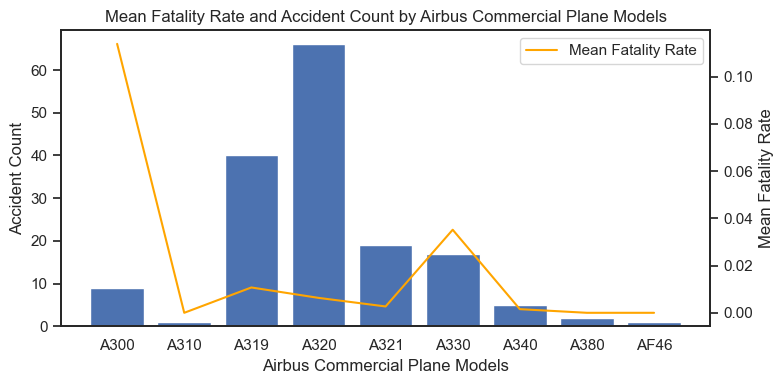

In [102]:
#Prepare count and mean fatality rate data based on Airbus Data
airbus_counts=c_planes_airbus['Model_New'].value_counts().sort_index()
airbus_mean_fatality=c_planes_airbus.groupby('Model_New')['Fatal_Injury_Rate'].mean().sort_index()

#Plot the Count and Mean Fatality for Airbus Models 
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot the accident count on the left y-axis
ax1.bar(airbus_counts.index, airbus_counts.values, label='Accident Count')

# Create a second axis for the count on the right y-axis where I will plot Mean Fatality Rate
ax2 = ax1.twinx()
ax2.plot(airbus_mean_fatality.index, airbus_mean_fatality.values, color='orange', label='Mean Fatality Rate')

# Set labels and legend
ax1.set_xlabel('Airbus Commercial Plane Models')
ax1.set_ylabel('Accident Count')
ax2.set_ylabel('Mean Fatality Rate')
plt.title('Mean Fatality Rate and Accident Count by Airbus Commercial Plane Models')
plt.legend()
plt.tight_layout();

In [103]:
#Creating a Pivot to see the Airbus Model informaton and 'Engine.type' and 'Number.of.Engines' information
airbus_model_engine=c_planes_airbus.pivot_table(index=['Model_New', 'Engine.Type', 'Number.of.Engines'], values='Fatal_Injury_Rate', aggfunc='mean')
airbus_model_engine

Fatal_Injury_Rate
Model_New Engine.Type Number.of.Engines                   
A300      Turbo Fan   2.0                         0.128201
          Turbo Jet   2.0                         0.000000
A310      Turbo Fan   2.0                         0.000000
A319      Turbo Fan   2.0                         0.010667
          Turbo Jet   2.0                         0.022269
          Unknown     1.0                         0.000000
                      2.0                         0.000000
A320      Turbo Fan   1.0                         0.008000
                      2.0                         0.007956
          Turbo Jet   2.0                         0.000000
          Unknown     1.0                         0.000000
                      2.0                         0.003968
A321      Turbo Fan   2.0                         0.000817
          Unknown     1.0                         0.000000
                      2.0                         0.006873
A330      Turbo Fan   2.0                         0.046026
          Unknown     2.0                         0.000000
A340      Turbo Fan   4.0                         0.001550
A380      Turbo Fan   4.0                         0.000000
          Unknown     1.0                         0.000000
AF46      Turbo Fan   2.0                         0.000000

#### Broad Phase of Flight Analysis

##### Broad Phase of Flight for Top 5 Private Plane Makers

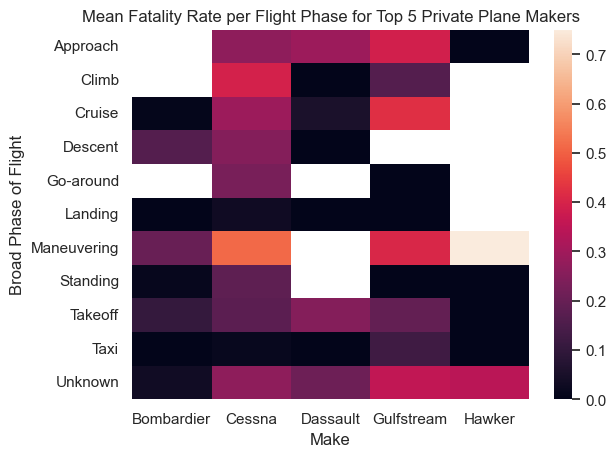

In [104]:
# Grouping by flight phase and calculate mean fatality rate
grouped_data_private = filtered_top5_pp.groupby(['Broad.phase.of.flight', 'Make'])['Fatal_Injury_Rate'].mean().reset_index()

# Create a pivot table to compare means across makes
pivot_table_private = grouped_data_private.pivot_table(index='Broad.phase.of.flight', columns='Make', values='Fatal_Injury_Rate')

# Create a heatmap to visualize the comparisons
import seaborn as sns
sns.heatmap(pivot_table_private)
plt.xlabel('Make')
plt.ylabel('Broad Phase of Flight')
plt.title('Mean Fatality Rate per Flight Phase for Top 5 Private Plane Makers')
plt.show();

##### Broad Phase of Flight for Commercial Planes

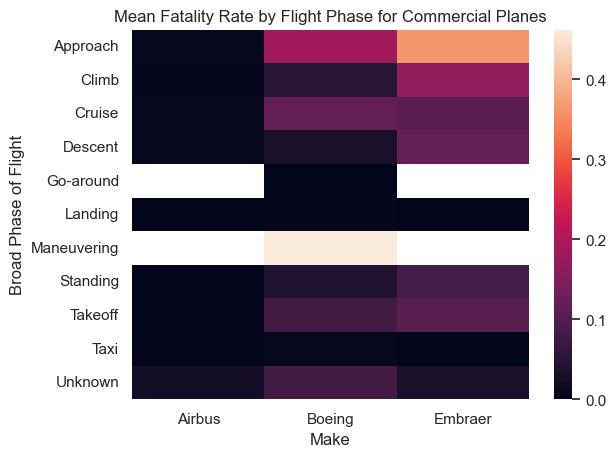

In [105]:
# Grouping by flight phase and calculate mean fatality rate
grouped_data_commercial = c_planes.groupby(['Broad.phase.of.flight', 'Make'])['Fatal_Injury_Rate'].mean().reset_index()

# Create a pivot table to compare means across makes
pivot_table_commercial = grouped_data_commercial.pivot_table(index='Broad.phase.of.flight', columns='Make', values='Fatal_Injury_Rate')

# Create a heatmap to visualize the comparisons
import seaborn as sns
sns.heatmap(pivot_table_commercial)
plt.xlabel('Make')
plt.ylabel('Broad Phase of Flight')
plt.title('Mean Fatality Rate by Flight Phase for Commercial Planes')
plt.show();

# Conclusions

Based on the analysis I will layout my key conclusions below:

***Engine Type Analysis***

Based on our analysis, I ***recommend prioritizing Reciprocating for private planes and Turbo Fan for for commercial planes.***
For private planes, Turbo Fan and Turbo Jet engines show promise but reciprocating engines consistently demonstrate lower overall risk profiles. Electric engines profile  warrant further investigation due to limited data. Turbo Jet engines are also a viable option for commercial planes. 

***Engine Number Analysis***

**Commercial Planes**
- The highest number of commercial aircraft accidents were related to planes with 2 engines.
- The lowest average fatality rate for commercial aircraft is with 3 engines.
  
**Private Planes**
- The highest number of private aircraft accidents were related to planes with 1 engine.
- The lowest average fatality rate for private aircraft is with 3, 6 and 8 engines.
  
Based on the accident count and the mean fatality rate, the recommendation will be that ***the private planes with 1 engine and the commercial planes with 2 or 3 engines seem to be the least risky.***

***The Pearson Correlation Coefficient*** based on Number of Engines and Fatality Rates for Commercial Planes was  -0.1445  which shows a weak negative correlation and it is not enough to conclude that Number of Engines is a major factor influencing fatality rates for commercial planes. The correlation coefficient for Private Planes was 0.0421 which also indicates a very weak positive correlation between number of engines and fatality rates for private planes.

***Airplane Type and Aircraft Damage***

Per the available information we can conclude that the majority accident information for Private Planes shows that the airplane damage is either substantial or destroyed. While the Commercial planes information shows that the damage is either substantial or unknown. Based on this information we cannot make a conclusion about risk however we can infer that commercial planes are larger and more robust and possibly, due to their type of business have more advanced safety features that can withstand more severe conditions.

***Private Planes analysis***

Based on our analysis of Bombardier, Cessna, Dassault, Gulfstream and Hawker comparing the number of accidents in the database vs the fatality rate we can conclude the following:
- Gulstream and Hawker have a low number of accidents with 132 and 47 respectively but also have the highest mean fatality rate at 0.278 and 0.324. Based on this information, Hawker is the riskiest Private Plane Maker.
- Cessna has the highest number of accidents, 23,533 and a medium mean fatality rate with 0.21.
- Bombardier and Dassault only have 105 and 41 accidents accordingly and also show the lowest mean fatality rate: 0.04 and 0.15. Based on this information, Bombardier is the safest Private Plane Maker.

Further looking into Bombardier and Dassault we get the following insights:

**Bombardier**
- The Bombardier Models with lowest mean fatality rate are: BD700 and 35A. The Model BD100 also has a close to 0 fatality rate but there is a higher number of accidents so the information seems more statistically significant.
- Based on Mean Fatality Rate and Engine Type the low-risk Bombardier Models to consider are: 35A, BD100 and BD700 with Turbo Fan Engine.
- Based on Mean Fatality Rate, Engine Type and Number of Engines the low-risk Bombardier Model to consider is only CL600 With Turbo Fan and 1 Engine.
  
**Dassault**
- The Dassault Models which seem low risk based on number of accidents and mean fatality rate are: FALCON 900, FALCON DA20 and FALCON 10. 
- Based on Mean Fatality Rate and Engine Type the low-risk Dassault Models to consider are: FALCON 10 and FALCON 900 with Turbo Fan.

***Commercial Planes Analysis***

Based on our analysis of Airbus, Boeing and Embraer comparing the number of accidents in the database vs the fatality rate we can conclude the following:
- Boeing  has the highest number of accidents 1,008 and the highest mean fatality rate of 0.084
- Embraer has 154 accidents 1,008 and a high mean fatality rate of 0.084 and the second highest mean fatality rate of 0.062
- Airbus  has 160 accidents and the lowest mean fatality rate of 0.016

Further looking into Airbus we can identify the following:
- The Airbus Models with lowest mean fatality rate are: A310, A380, AF46, A340 and A320
- Based on Mean Fatality Rate and Number of Engines, the low-risk Airbus Model will be A320 with Turbo Jet Engine and 2 Engines.

***Broad Phase of Flight Analysis***

Based on the two different heatmaps plotted to compare mean fatality rate against broad phases of flight by the top Makers for both Commercial and Private Planes the conclusion is that there is not a real trend. In both heatmaps I can see that the fatality rate changes per Maker and per the phase of the flight. The key takeaway will be that for Private Planes the highest fatality has been during Maneuvering for both Cessna and Hawkers Plane Makers. In the case of Commercial Planes we can see the highest fatality is for Boeing during Maneuvering and for Embraer during Approach. 

### Recommendations

Based on the information available in the NTSB aviation accident database and the assumptions I made, I will present the following recommendations to my stakeholders:

***Private Aircrafts***

- Prioritize: Aircraft using Reciprocating, Turbo Fan, or Turbo Jet engines.
- Number of Engines: Opt for aircraft with 1 engine for the lowest fatality rates.
- Manufacturers:
1. Bombardier, specific models: 35A, BD100, and CL600.
2. Dassault, specific models: FALCON 10 and FALCON 900.

***Commercial Aircrafts***

- Prioritize: Aircraft using Turbo Fan or Turbo Jet.
- Number of Engines: Consider 2 or 3 engines for optimal safety.
- Airbus is the safest manufacturer, prioritizing models: A340 and A380 due to low fatality rates and accident count as well as A320 due to its safety and market popularity.

Overall, these recommendations provide a solid foundation for selecting low-risk aircraft. However, it's essential to conduct further research to make an informed decisions.

### Next steps

1. **Deepen Stakeholder Engagement** to gather detailed information about their goals, priorities, and concerns to expand to the aircraft industry.

2. **Expand Data Sources** by exploring industry databases, such as the Federal Aviation Administration's (FAA) Aviation Safety Database, to access comprehensive information on aircraft accidents, incidents, and safety regulations. As well as do research by interviewing industry experts to collect information not collected in existing databases.

3. **Develop a Comprehensive Analysis and Model:**
- Incorporate more factors to the analysis to identify aircraft safety and define business viability such as aircraft type, operating environment, maintenance practices, pilot experience, and regulatory compliance.
- Use machine learning or data mining to identify patterns and trends in the data.

### Limitations

##### Analysis Limitations

1. **Narrow Focus:** this analysis focus on a broad business question and only relies on a single data source, which limits the ability to provide actionable insights for real-world decision making.
2. **Oversimplified Factors:** this analysis oversimplifies the factors involved in determining aircraft safety and business viability. As I only focusing on "low-risk aircraft" without considering other relevant factors when taking a business decision such as satety protocoals, costs, forecasts, ROI and market trends.
3. **Lack of Industry context:** this analysis does not consider the broader context of the aviation industry. Factors like market trends, regulatory changes, technnological changes, economic environment can affect the value and relevace of only focusing on "low-risk aircrafts" in a real-world business decision.

In [140]:
#Creating data copy for tableau
# makes_for_tableau = ['Boeing', 'Airbus', 'Embraer','Bombardier', 'Cessna', 'Dassault', 'Gulfstream', 'Hawker']
# makes_tableu = df[df['Make'].isin(makes_for_tableau)]
#Saving the database to use in Tableau
# makes_tableu.to_csv('./data/tableau_data.csv')